<a href="https://colab.research.google.com/github/lisabroadhead/store-vender-forecast/blob/main/project_part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Store Vendor Forecast
Lisa Broadhead <br/>
June 15, 2022

1. Importing data
2. Data cleaning
3. Data exploration and analysis
4. Explanatory Visualization and Explaination


# Loading Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
filename = "/content/drive/MyDrive/Colab Notebooks/coding_dojo/files/sales_predictions (1).csv"

In [7]:
df = pd.read_csv(filename)
df.head(100)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
95,FDU04,NaN,Low Fat,0.009715,Frozen Foods,120.0414,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
96,FDF41,12.15,Low Fat,0.131384,Frozen Foods,246.0460,OUT049,1999,Medium,Tier 1,Supermarket Type1,1231.7300
97,FDB56,8.75,Regular,0.074613,Fruits and Vegetables,187.4556,OUT035,2004,Small,Tier 2,Supermarket Type1,3755.1120
98,NCP18,NaN,Low Fat,0.028460,Household,149.9708,OUT027,1985,Medium,Tier 3,Supermarket Type3,4363.6532


# Data Cleanup

## 1. How many rows and columns?

In [8]:
df.shape

(8523, 12)

## 2. What are the datatypes of each variable?

In [9]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 3. Are there duplicates? If so, drop any duplicates.

In [11]:
# df.duplicated().sum()
df = df.drop_duplicates()
df.duplicated().sum()

0

## 4. Identify missing values.

In [12]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## 5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [13]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### Outlet_size

It's too large to drop, so we replace all the nan with zeros

We used zeros because we just need a placeholder for the missing data and zero is a good enough choice as any

In [14]:
df['Outlet_Size'].isna().sum()

2410

In [15]:
df['Outlet_Size'].unique() 

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [16]:
# so too large to just delete or drop
2410/ 8523

0.2827642848762173

In [17]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(0)

In [18]:
df['Outlet_Size'].unique() 

array(['Medium', 0, 'High', 'Small'], dtype=object)

In [19]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
df['Outlet_Size'].replace('Small','Low', inplace=True)

### Item_weight

replaced nan with the mean because I didn't want it to mess up any statics of the column. Putting a 0 would do that and putting a string would turn the whole column into an object

In [21]:
df['Item_Weight'].isna().sum()

1463

In [22]:
df.groupby(['Item_Weight']).mean()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,,,,
4.555,0.034362,111.729400,1996.750000,1761.706800
4.590,0.056632,112.546000,1997.800000,1267.683200
4.610,0.117167,173.825314,2002.285714,1993.595429
4.615,0.102001,232.455000,2000.000000,4078.025000
4.635,0.141144,127.199400,2001.800000,2184.489800
...,...,...,...,...
21.000,0.054926,193.931133,2000.666667,1194.778100
21.100,0.053389,143.143588,2000.882353,1851.472306
21.200,0.040697,174.579080,2002.000000,2763.735800


In [23]:
item_weigth_mean = df['Item_Weight'].notnull().mean()
item_weigth_mean

0.8283468262348939

In [24]:
df['Item_Weight'] = df['Item_Weight'].fillna(item_weigth_mean)

In [25]:
df['Item_Weight'].isna().sum()

0

In [26]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 6. Confirm that there are no missing values after addressing them.

In [27]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)

In [28]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [29]:
for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Weight
[ 9.3         5.92       17.5        19.2         8.93       10.395
 13.65        0.82834683 16.2        11.8        18.5        15.1
 17.6        16.35        9.         13.35       18.85       14.6
 13.85       13.          7.645      11.65        5.925      19.25
 18.6        18.7        17.85       10.          8.85        9.8
 13.6        21.35       12.15        6.42       19.6        15.85
  7.39       10.195       9.895      10.895       7.905       9.195
  8.365       7.97       17.7        19.35        8.645      15.6
 18.25        7.855       7.825       8.39       12.85       19.
  5.905       7.76       16.75       15.5         6.055       6.305
 20.85       20.75        8.895      19.7         8.75       13.3
  8.31       19.75       17.1        10.5         6.635      14.15
  8.89        9.1         7.5        16.85        7.485      11.6
 12.65       20.25        8.6        12.6         

In [30]:
for val in df['Item_Outlet_Sales'].unique():
    print(val)

3735.138
443.4228
2097.27
732.38
994.7052
556.6088
343.5528
4022.7636
1076.5986
4710.535
1516.0266
2187.153
1589.2646
2145.2076
1977.426
1547.3192
1621.8888
718.3982
2303.668
2748.4224
3775.086
4064.0432
1587.2672
214.3876
4078.025
838.908
1065.28
308.9312
178.4344
125.8362
163.7868
2741.7644
3068.0064
2174.5028
2085.2856
3791.0652
2797.6916
1609.9044
388.1614
2180.495
3435.528
2150.534
2527.3768
6768.5228
373.5138
358.2004
2428.8384
5815.0972
2576.646
780.3176
3134.5864
850.8924
810.9444
3121.2704
4815.0656
6258.52
2117.244
796.9626
4910.275
892.172
3185.1872
1062.6168
484.7024
147.8076
2543.356
184.4266
4865.6664
1118.544
2302.3364
2027.361
599.22
4604.6728
2285.0256
5580.7356
2290.352
1207.0954
643.1628
1587.933
5305.0944
1697.79
1427.4752
4693.89
583.2408
3091.9752
2479.4392
2716.464
3285.723
661.8052
1523.3504
369.519
690.4346
1381.535
622.523
1274.3412
487.3656
1231.73
3755.112
4363.6532
1314.2892
1805.6496
2854.9504
3896.2616
667.7974
3185.853
2247.7408
1794.331
2530.7058
679.11

### Checking values

In [31]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [32]:
df.groupby(['Item_Identifier'])

In [33]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [34]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [35]:
df['Outlet_Identifier'].unique() 

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [36]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [37]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [38]:
df['Outlet_Establishment_Year'].unique() 

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

### Fixing column Item_Fat_Content

In [39]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [40]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat'})

In [41]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [42]:
# Outlet_Size
df['Outlet_Size'].replace('Medium', 'Medium-High', inplace=True)

In [43]:
df['Outlet_Size'].replace('Low', 'Medium-Low', inplace=True)

In [44]:
df['Outlet_Size'].replace(0, 'Low', inplace=True)

## 8. For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [45]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium-High,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium-High,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium-High,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Low,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Item_weight
1. min
2. max
3. mean

In [46]:
df['Item_Weight'].min()

0.8283468262348939

In [47]:
df['Item_Weight'].max()

21.35

In [48]:
df['Item_Weight'].mean()

10.792777942835391

### Item_Visibility


In [49]:
df['Item_Visibility'].min()

0.0

In [50]:
df['Item_Visibility'].max()

0.328390948

In [51]:
df['Item_Visibility'].mean()

0.06613202877895127

### Item_MRP

In [52]:
df['Item_MRP'].min()

31.29

In [53]:
df['Item_MRP'].max()

266.8884

In [54]:
df['Item_MRP'].mean()

140.9927819781768

### Outlet_Establishment_Year

In [55]:
df['Outlet_Establishment_Year'].min()

1985

In [56]:
df['Outlet_Establishment_Year'].max()

2009

In [57]:
df['Outlet_Establishment_Year'].mean()

1997.8318667135984

### Item_Outlet_Sales

In [58]:
df['Item_Outlet_Sales'].min()

33.29

In [59]:
df['Item_Outlet_Sales'].max()

13086.9648

In [60]:
df['Item_Outlet_Sales'].mean()

2181.2889135750365

# Data Exploration 

## 1. Histogram to view the distributions of various features in your dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c7a8eead0>,
      dtype=object)

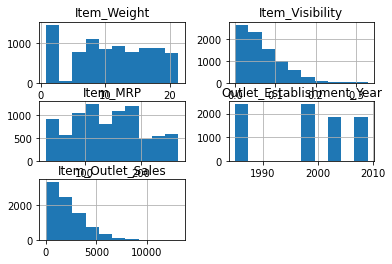

In [61]:
df.hist()

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text major ticklabel objects>)

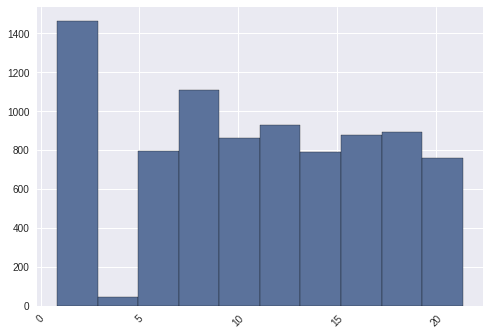

In [62]:
plt.style.use('seaborn')
df['Item_Weight'].hist(bins=10,edgecolor='black', facecolor='#5B729B')
plt.xticks(rotation = 45)

### Interpretations
- Looks like the item weight hovers around 5-20lbs
- with an outlier that is around 2-3

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 <a list of 9 Text major ticklabel objects>)

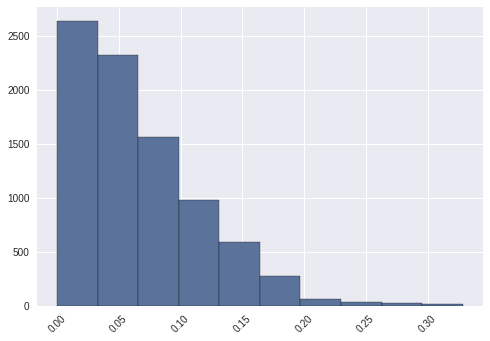

In [63]:
plt.style.use('seaborn')
df['Item_Visibility'].hist(bins=10,edgecolor='black', facecolor='#5B729B')
plt.xticks(rotation = 45)

### Interpretations
- 75% Item visibility  > .15

### Interpretations
- Not really sure, beacuse I'm not sure what MRP is signifying. But there's no big outliers on either side
- And are lowest is around 200
- with highs around 100 & 175

(array([1980., 1985., 1990., 1995., 2000., 2005., 2010., 2015.]),
 <a list of 8 Text major ticklabel objects>)

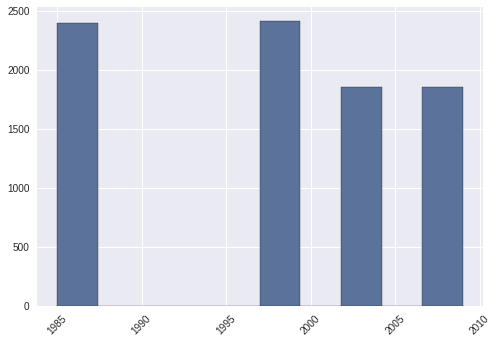

In [64]:
plt.style.use('seaborn')
iyears = df.loc[:,'Outlet_Establishment_Year']
df['Outlet_Establishment_Year'].hist(bins=10,edgecolor='black', facecolor='#5B729B')
plt.xticks(rotation = 45)

### Interpretations
- Looks like there's a spike in gordery stores every 10 years: 1986, then in 1998
- Was this data taken when the sore was annocuer or when they opened their doors to the public?
- Wonder what was going on between 1985-1998 to have nothing happen
- I wonder if these numbers signify the amount of totally new establisments, or just new stores in a new area. Like Smiths setting up a new store in the next town over opposed to Harriets which is totally new
- Also wonder why there's a spike in stores when sales drop


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000.]), <a list of 9 Text major ticklabel objects>)

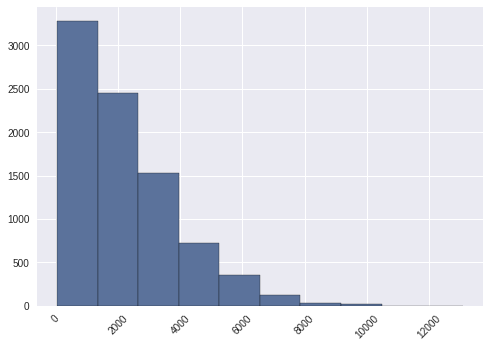

In [65]:
plt.style.use('seaborn')
isale = df.loc[:,'Item_Outlet_Sales']
df['Item_Outlet_Sales'].hist(bins=10,edgecolor='black', facecolor='#5B729B')
plt.xticks(rotation = 45)

## 2. Boxplot to view statistical summaries of various features in your dataset. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

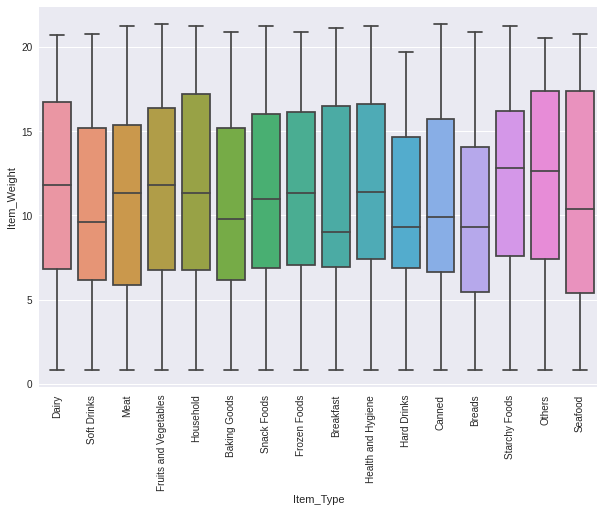

In [66]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Item_Type", y="Item_Weight", data=df)
plt.xticks(rotation=90)

### Interpretations
- Looks like seafoor has the widest range of food weights
- and Breads seem to be and lightes


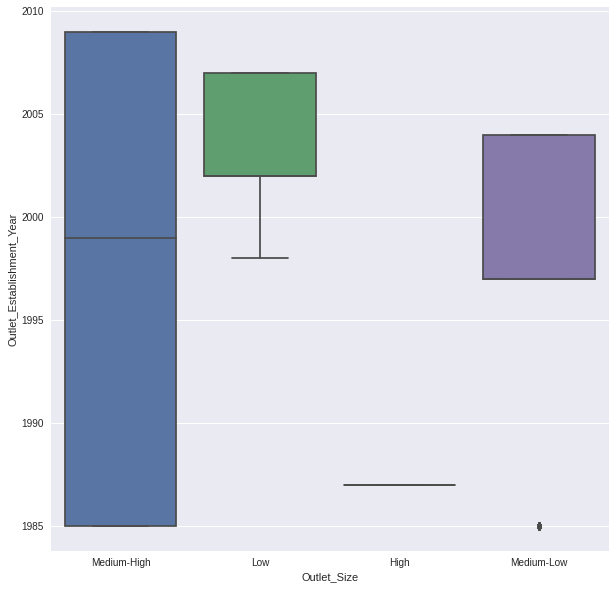

In [68]:
notMissing = df['Outlet_Size'] != 0
plt.figure(figsize=(10,10))
sns.boxplot(data=df, y="Outlet_Establishment_Year", x='Outlet_Size')

### Interpretations
- Looks like smaller grocery stores are going up and large ones are going down over time
- 


In [69]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium-High,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium-High,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium-High,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Low,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


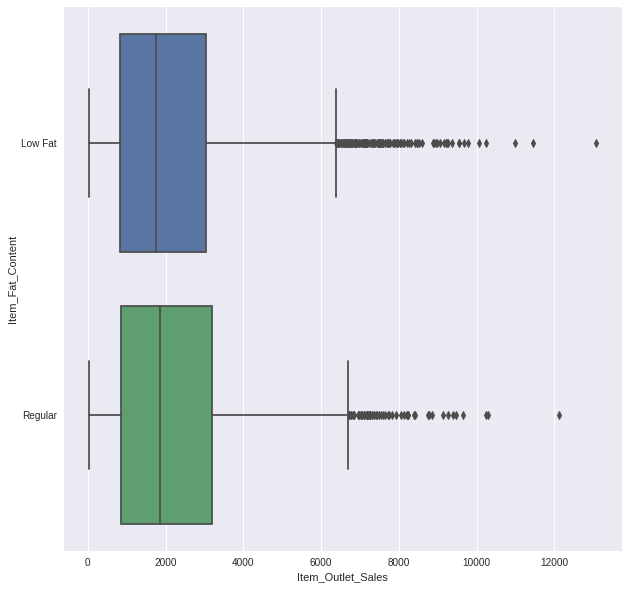

In [70]:
notMissing = df['Outlet_Size'] != 0
plt.figure(figsize=(10,10))
sns.boxplot(data=df, y="Item_Fat_Content", x='Item_Outlet_Sales')

### Interpretations
- looks there's an even number of regular and low fat products bought

### Resources
1. Changing Boxplot size - https://stackoverflow.com/questions/32443803/adjust-width-of-box-in-boxplot-in-python-matplotlib
2. Changing the figuresize - https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
3. 

## 3. Heatmap of the correlation between features.

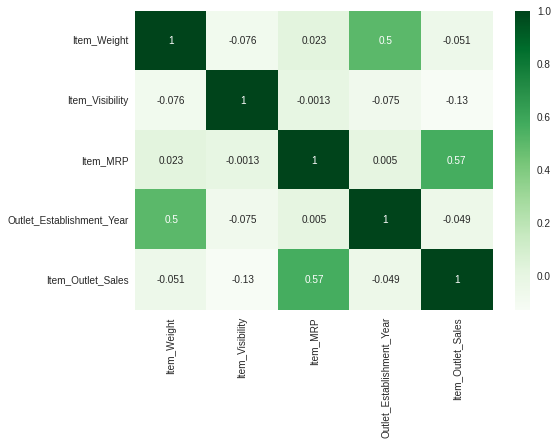

In [71]:
corr = df.corr()
sns.heatmap(corr, cmap="Greens", annot=True)

### Interpretations 
- Medium correlation between 'Item MRP' and 'Item Outlet Sales
- Medium correlation between 'Item Weight' and 'Outlet Establisment Year'
- Other than then the correction numbers are not significatn enought to draw conculsinos


# Explanatory Visualization
The goal of this is to help the retailer understand what size and type of store is bringing in the most reveune. What type of stores shoul they continue to build


In [72]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium-High,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium-High,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium-High,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Low,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Overall stats

**fig #1**
- Even though the dates are getting closer together, the overall treand of buiilding stores has decreased

**fig #2**
- total revune for the stores has also gone down over the years
- what's intesting to note is that there's a significatn drop around 2000 - but not a huge revenue drop
- And even though there's not a stores drop around 2005 - 2009, there is a revenu drop around that time

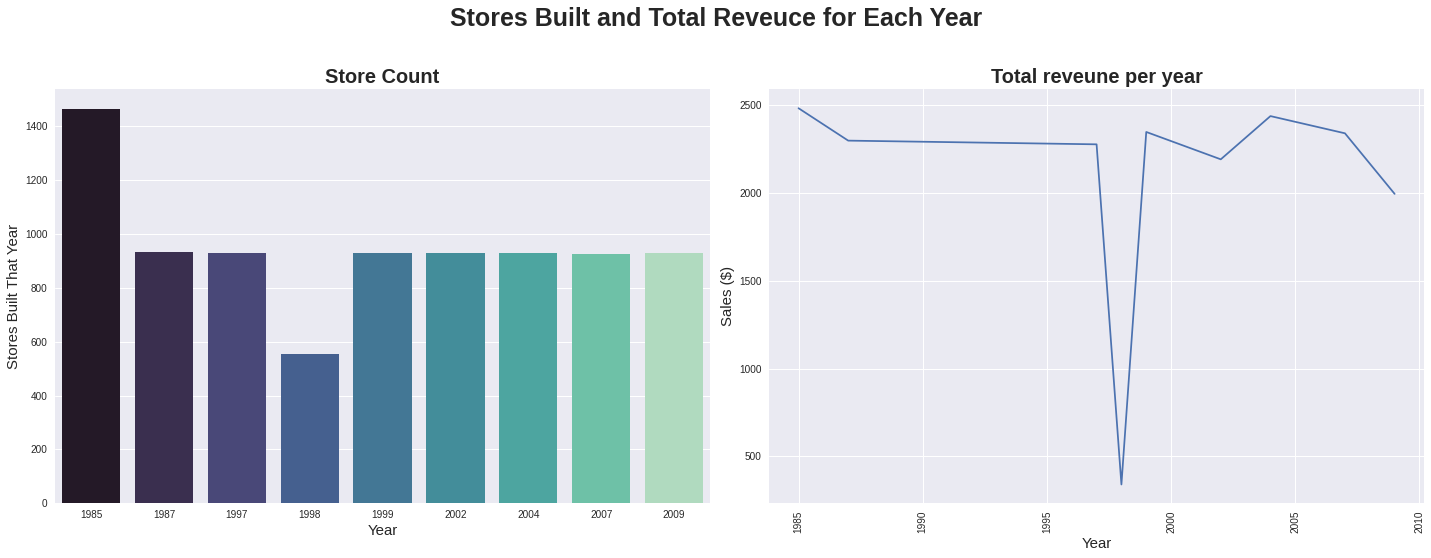

In [122]:
f, axes = plt.subplots(1, 2,figsize=(20,7))


sns.countplot(data=df, x="Outlet_Establishment_Year", ax=axes[0], palette="mako")
axes[0].set_title('Store Count', fontsize = 20, fontweight = 'bold')
axes[0].set_xlabel("Year", fontsize=15)
plt.xticks(rotation=90)
axes[0].set_ylabel("Stores Built That Year", fontsize=15)


sns.lineplot(data=df, x="Outlet_Establishment_Year", y="Item_Outlet_Sales",  ax=axes[1], markers='o', ci=None)
axes[1].set_title('Total reveune per year', fontsize = 20, fontweight = 'bold')
axes[1].set_xlabel("Year", fontsize=15)
axes[1].set_ylabel("Sales ($)", fontsize=15)

f.suptitle('Stores Built and Total Reveuce for Each Year', fontsize = 25, fontweight = 'bold', y=1.1)
f.tight_layout()

#### Types of stores being built

- Over the years more Supermarket1 starores are being built

Text(0, 0.5, 'Store Count')

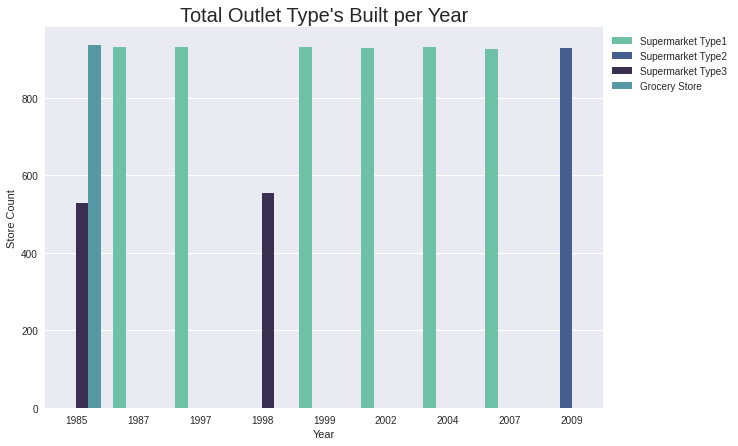

In [252]:
plt.figure(figsize=(10,7))
palette = sns.color_palette(["#60CEAC","#395D9C","#382A55","#4AA1B2"])

sns.countplot(data=df, x="Outlet_Establishment_Year", hue="Outlet_Type", palette=palette)
plt.legend(bbox_to_anchor=(1,1),labels=["Supermarket Type1","Supermarket Type2", "Supermarket Type3","Grocery Store"])
plt.title("Total Outlet Type's Built per Year", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Store Count")


#### Total Sales from each store

In [75]:
items = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values()

**FIG: 1**
- Supermarket1 generates the most sales 
- which is why we don't see a revenue drop when there's a drop in store building around 2000
- Supermarket2 make quite a bit less money which is why there's reveune dip when those stores are built in 2009

**FIG: 2**
- Even though Categorically Supermarket3 has hgihter sales overall suerpmarket2 is has better sales

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


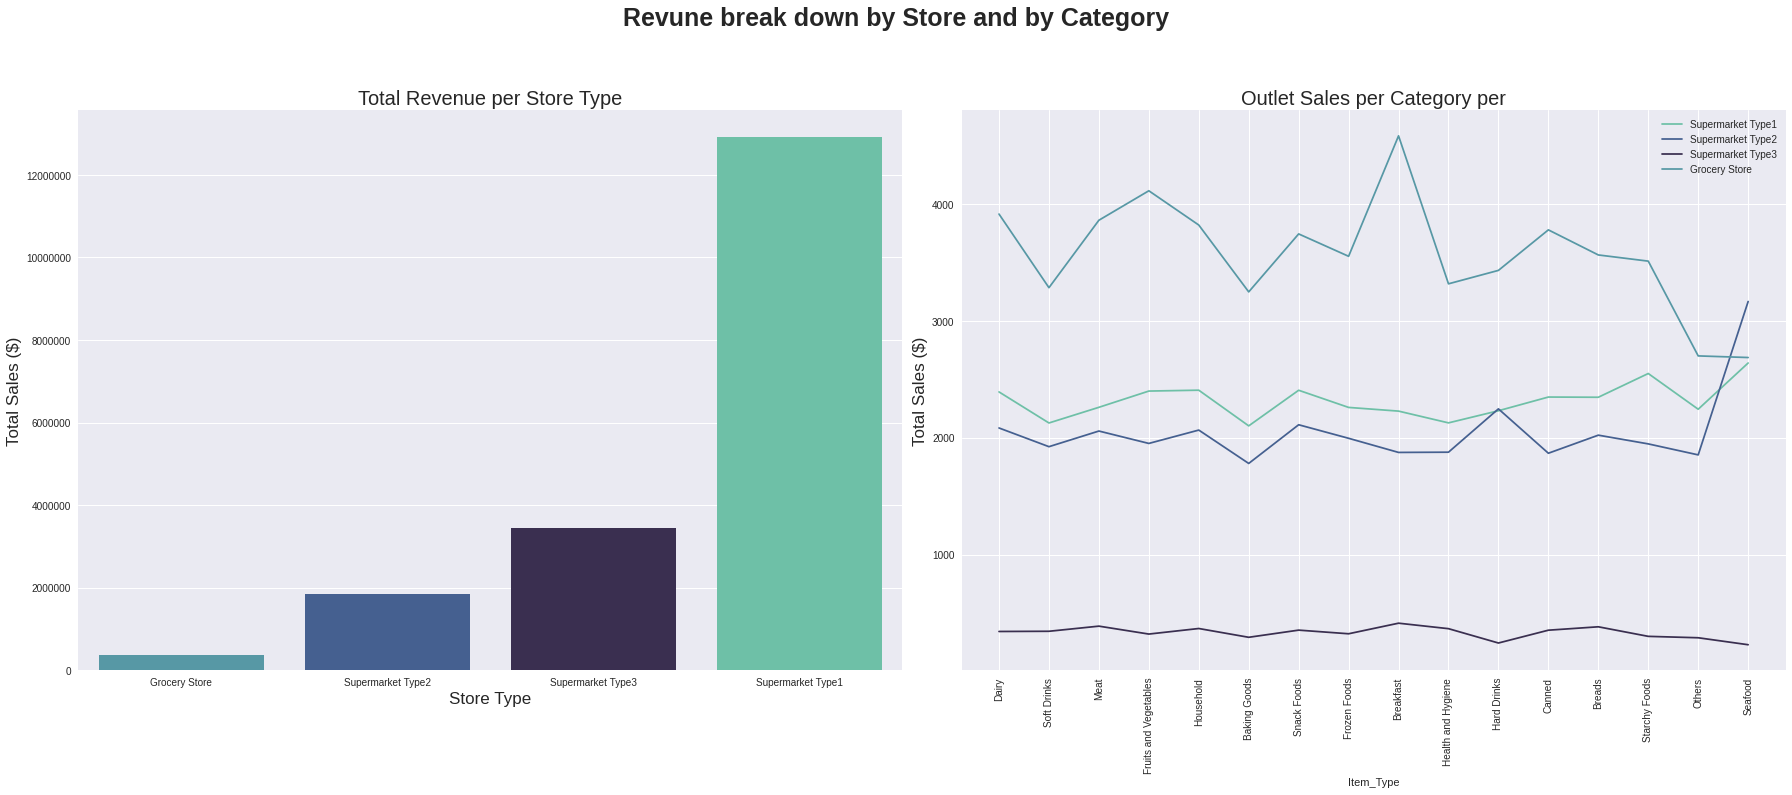

In [257]:
f, axes = plt.subplots(1, 2,figsize=(25,10))

palette = sns.color_palette(["#4AA1B2","#395D9C","#382A55","#60CEAC"])
palette1 = sns.color_palette(["#6EC0A7","#456090","#3A2F50","#5798A5"])

sns.barplot(items.index, items.values, data=df, ax=axes[0],palette=palette)
axes[0].set_title("Total Revenue per Store Type", fontsize=20,  x=0.5, y=1)
axes[0].set_xlabel("Store Type", fontsize=17)
plt.xticks(rotation=90)
axes[0].set_ylabel("Total Sales ($)", fontsize=17)
axes[0].ticklabel_format(style='plain', axis='y')

sns.lineplot(data=df, x='Item_Type', hue='Outlet_Type', y="Item_Outlet_Sales", palette=palette1, ci=None,  ax=axes[1])
axes[1].set_title("Outlet Sales per Category per", fontsize=20,  x=0.5, y=1)
axes[1].set_ylabel("Store Type", fontsize=17)
axes[1].set_ylabel("Total Sales ($)", fontsize=17)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1),labels=["Supermarket Type1","Supermarket Type2", "Supermarket Type3","Grocery Store"])

f.suptitle('Revune break down by Store Type and Product Category', fontsize = 25, fontweight = 'bold', y=1.1)
f.tight_layout()

plt.show()

#### Look deeper into the size or Supermarket1

Text(0, 0.5, 'Store Count')

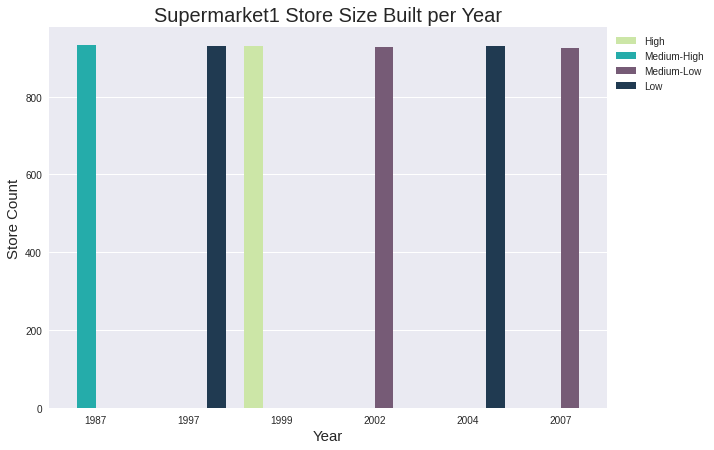

In [267]:
plt.figure(figsize=(10,7))

palette = sns.color_palette(["#CEF09D","#0FC2C0","#7A577A","#183B59"])

size = df['Outlet_Type'] == 'Supermarket Type1'
sns.countplot(data=df[size], x="Outlet_Establishment_Year", hue="Outlet_Size", palette=palette)
plt.legend(bbox_to_anchor=(1,1), labels=["High","Medium-High", "Medium-Low","Low"])
plt.title("Supermarket1 Store Size Built per Year", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Store Count", fontsize=15)
# Supermarket1 stores have gotten smaller over the years

No handles with labels found to put in legend.


Text(0, 0.5, 'Store Count')

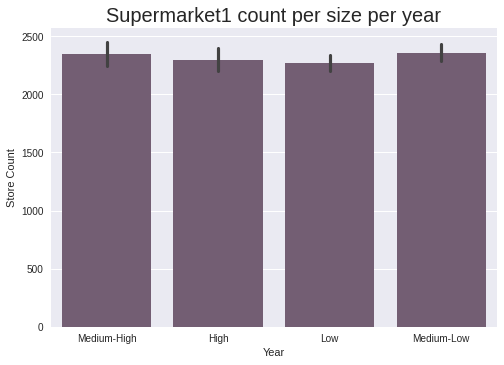

In [268]:
sns.barplot(data=df[size], y="Item_Outlet_Sales", x="Outlet_Size", color="#765B76")
plt.legend(bbox_to_anchor=(1,1))
plt.title("Supermarket1 count per size per year", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Store Count")
# Supermarket1 medium-low seems to make the most revenu

### Summary - best revenu generating store over time
1. Type :  supermarket1
2. Size : Medium-low

